<h1 style="display: flex; align-items: center; font-size: 50px; margin-bottom: 15px;">
  Anàlisi de la Petjada Hídrica dels Turistes a Barcelona
<h1 style="display: flex; align-items: center; font-size: 30px; margin-bottom: 25px;">
  Bruno Manzano & Paula Mateos | Analítica Visual 2024-2025

## 1. Problem Statement

In the age of digital music streaming, platforms like Spotify have revolutionized the way we discover, share, and consume music. However, despite the vast amounts of data available, predicting the success of a song remains a challenging task. Success in the music industry is often subjective, varying from artist to artist, genre to genre, and listener to listener. Yet, there is no denying that certain patterns emerge songs with particular characteristics tend to perform better than others on platforms like Spotify. The project aims to explore these patterns, leveraging data science and machine learning to uncover insights that can predict the future success of a song. The project seeks to bridge the gap between creativity and data, providing artists, stakeholders, and fans with actionable insights about what contributes to a song's success on Spotify. Ultimately, the goal is to create a prediction model that can assist artists and producers in making data-driven decisions, optimizing song releases, and maximizing streams.

## 2. Dataset Overview

The dataset used in this project is sourced from Kaggle and is based on the Top Spotify Songs of 2023 (https://www.kaggle.com/datasets/nelgiriyewithana/top-spotify-songs-2023/data). It includes a rich collection of data points for songs released in 2023, such as:

- Track names and artist names
- Release dates (year, month, and day)
- Key performance indicators like Spotify streams, playlist reach, and chart positions across multiple platforms (Spotify, Apple Music, Deezer, Shazam, etc.)
- Musical attributes, such as tempo (BPM), key, mode, danceability, energy, valence, acousticness, and more.

This dataset provides a comprehensive overview of what characteristics are present in the most popular songs of 2023 and serves as the foundation for the project’s analysis and predictive modeling. The exploratory analysis of the data will reveal insights into song release trends, artist collaboration patterns, and genre performance. Understanding these patterns is crucial for predicting the factors that contribute to a song’s success on Spotify.


## 3. Business Questions and Objectives

The project addresses several key business questions that are relevant to the music industry:

1. **What are the key characteristics of successful songs on Spotify?** By analyzing the dataset, we will explore trends such as which attributes, whether they be the genre, tempo, or mood, are correlated with higher streaming numbers. This analysis will help determine what makes certain songs stand out on Spotify.


2. **How do different metrics (streams, playlist reach, chart performance) correlate with each other?** Understanding the relationship between metrics like Spotify streams, playlist placements, and chart rankings will help identify the most significant factors driving a song's success. Is it having a massive presence on Spotify playlists, or is it more about raw streaming numbers?


3. **Can we predict the number of streams a song will achieve based on its characteristics?** The core of the project lies in developing a predictive model that takes a song's characteristics, such as tempo, danceability, and energy, and predicts its number of streams. This model will not only serve as a tool for artists and producers but also allow them to optimize their songs for better performance on Spotify.

## 4. Overall Goals

The primary goal of this project is to provide a web application that allows artists, producers, and fans to gain valuable insights into the dynamics of music success on Spotify. The platform combines:

- **Data exploration:** Visualizing trends in song characteristics, genres, and artist collaborations.  
- **Prediction:** Providing a prediction model that allows users to input a song’s features (such as tempo, energy, and danceability) and receive a forecast of its potential streams.  
- **Optimization:** Offering recommendations based on historical performance trends for playlist placements, release timing, and song characteristics.  

This project offers a unique intersection of data science and music, providing insights that are actionable and relevant to those working in the music industry. By using machine learning and explainable AI (XAI), we aim to offer not just predictions, but explanations for why certain factors contribute to a song's success. In this way, the project not only serves as a predictive tool but also helps demystify the relationship between song characteristics and streaming success.

Additionally, this project demonstrates the powerful application of data analysis and machine learning in a creative field like music. It showcases how data can inform decision-making in industries where success has traditionally been hard to quantify. By leveraging Spotify’s vast data ecosystem, we analyze large datasets, perform exploratory analysis, build prediction models, and integrate Explainable AI (XAI) to make predictions more transparent and interpretable.

This endeavor reflects the skills and techniques learned in the data analysis course, particularly in areas such as data preprocessing, feature engineering, exploratory data analysis (EDA), machine learning, and model evaluation. It highlights the importance of combining domain-specific knowledge (in this case, music and streaming platforms) with technical expertise to create useful and innovative solutions.

Through this project, I’ve learned how to tackle complex problems—from data cleaning and handling missing values to building predictive models that integrate domain knowledge. It emphasizes that data analysis can play a crucial role in optimizing decisions across various industries, not just in traditional sectors but also in creative and entertainment fields like music.


## 5. Data exploration

In [239]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')


### Step 1: Load and clean the dataset
The following code loads the Spotify dataset, drops rows with missing values and a specific defective track, and then displays a preview of the cleaned data while confirming there are no remaining missing values.

In [240]:
# Load the dataset with 'ISO-8859-1' encoding
df = pd.read_csv('spotify-2023.csv', encoding='ISO-8859-1')

# Drop rows with missing values in any column
df = df.dropna()
df = df[df['track_name'] != 'Love Grows (Where My Rosemary Goes)'] # Defective line with wrong format


# Display the first few rows after dropping NaNs
print("Data preview after dropping NaNs:")
print(df.head())

# Check for any missing values to confirm
print("Missing values after dropping rows with NaNs:")
print(df.isnull().sum())

Data preview after dropping NaNs:
                            track_name       artist_name  artist_count  \
0  Seven (feat. Latto) (Explicit Ver.)  Latto, Jung Kook             2   
1                                 LALA       Myke Towers             1   
2                              vampire    Olivia Rodrigo             1   
3                         Cruel Summer      Taylor Swift             1   
4                       WHERE SHE GOES         Bad Bunny             1   

   released_year  released_month  released_day  in_spotify_playlists  \
0           2023               7            14                   553   
1           2023               3            23                  1474   
2           2023               6            30                  1397   
3           2019               8            23                  7858   
4           2023               5            18                  3133   

   in_spotify_charts    streams  in_apple_playlists  ...  bpm key   mode  \
0           

### Step 2: Examine the Fields and Columns

In [241]:
# Display column names
print("Columns in the dataset:")
print(df.columns)

# Check for missing values in the dataset
print("\nMissing values:")
print(df.isnull().sum())

# Get the data types of each column
print("\nData types of the columns:")
print(df.dtypes)

# Get basic statistics for numerical columns
print("\nBasic Statistics:")
print(df.describe())


Columns in the dataset:
Index(['track_name', 'artist_name', 'artist_count', 'released_year',
       'released_month', 'released_day', 'in_spotify_playlists',
       'in_spotify_charts', 'streams', 'in_apple_playlists', 'in_apple_charts',
       'in_deezer_playlists', 'in_deezer_charts', 'in_shazam_charts', 'bpm',
       'key', 'mode', 'danceability_%', 'valence_%', 'energy_%',
       'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%'],
      dtype='object')

Missing values:
track_name              0
artist_name             0
artist_count            0
released_year           0
released_month          0
released_day            0
in_spotify_playlists    0
in_spotify_charts       0
streams                 0
in_apple_playlists      0
in_apple_charts         0
in_deezer_playlists     0
in_deezer_charts        0
in_shazam_charts        0
bpm                     0
key                     0
mode                    0
danceability_%          0
valence_%               0
energy_%

### Step 3: Filter Songs from 2006 and Ahead

This is done because 2006 is the year when spotify was founded, and we want to analyze enteries, so this seems like the best way of action.

In [242]:
# Convert 'released_year' to numeric (if it's not already) and handle any errors
df['released_year'] = pd.to_numeric(df['released_year'], errors='coerce')

# Filter the dataset to include only songs released from 2006 and onwards
df_filtered = df[df['released_year'] >= 2006]

# Verify the result to make sure the filtering is correct
print(f"Minimum year in df_filtered: {df_filtered['released_year'].min()}")  # Should be 2006 or later

# Display the first few rows of the filtered dataset
df_filtered.head()

Minimum year in df_filtered: 2008


,track_name,artist_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6


### Step 4: Clamp streams to contain only the first year.
In this step, we apply a decay model to estimate the fraction of streams that occurred in the first year after release. The decay function simulates how streams decline over time, with a higher decay factor meaning faster decline. We calculate the streams for the first year based on the total streams and the years since release. After applying this calculation, we update the streams column to reflect only the `first-year streams` and restore the original data type.

In [243]:
import numpy as np

def fraction_first_year_streams(total_streams, years_since_release, decay_factor=0.02):
    """
    Calculate the fraction of streams that occurred in the first year after release.
    
    Args:
    total_streams (int): Total streams that occurred during all years.
    years_since_release (int): The number of years since the release of the song.
    decay_factor (float): A factor to adjust the decay. Higher values result in more decay.
    
    Returns:
    float: The fraction of streams that occurred during the first year after release.
    """
    if years_since_release <= 0:
        raise ValueError("Years since release must be greater than 0.")
    
    # Decay model to simulate stream distribution over the years
    # We use a simple exponential decay for each year after the release.
    decay_rate = np.exp(-decay_factor * np.arange(years_since_release))  # Exponential decay for each year
    
    # Total decay sum for normalization
    total_decay = np.sum(decay_rate)
    
    # Fraction of streams in the first year is the decay in the first year divided by total decay
    fraction_first_year = decay_rate[0] / total_decay
    
    # The fraction of total streams in the first year
    first_year_streams = total_streams * fraction_first_year
    
    return first_year_streams

# save streams datatype to convert it back after the calculation
data_type = df_filtered['streams'].dtype
df_filtered['streams'] = df_filtered['streams'].astype(int)
# Apply that to the filtered dataset. (calculate the years since release by doing 2024 - released_year)
df_filtered['streams'] = df_filtered.apply(lambda x: fraction_first_year_streams(x['streams'], 2024 - x['released_year']), axis=1).astype(int)

# convert back into original datatype
df_filtered['streams'] = df_filtered['streams'].astype(data_type)

df_filtered.tail()

,track_name,artist_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
948,My Mind & Me,Selena Gomez,1,2022,11,3,953,0,46194033,61,...,144,A,Major,60,24,39,57,0,8,3
949,Bigger Than The Whole Sky,Taylor Swift,1,2022,10,21,1180,0,61545274,4,...,166,F#,Major,42,7,24,83,1,12,6
950,A Veces (feat. Feid),"Feid, Paulo Londra",2,2022,11,3,573,0,37124397,2,...,92,C#,Major,80,81,67,4,0,8,6
951,En La De Ella,"Feid, Sech, Jhayco",3,2022,10,20,1320,0,67617261,29,...,97,C#,Major,82,67,77,8,0,12,5
952,Alone,Burna Boy,1,2022,11,4,782,2,48483716,27,...,90,E,Minor,61,32,67,15,0,11,5


### Step 5: Add interesting columns from static analysis
In this step, we will create a new column called 'number_characters', which stores the length of each song's track_name. We use the apply function to apply the len function to each track_name. We have seen this in the Tableau study, it is an important feature.

In [244]:
# Add a column 'Number of Characters' to the dataset
df_filtered['number_characters'] = df_filtered['track_name'].apply(len)
df_filtered.head()

,track_name,artist_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,number_characters
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,B,Major,80,89,83,31,0,8,4,35
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,C#,Major,71,61,74,7,0,10,4,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,F,Major,51,32,53,17,0,31,6,7
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,166638087,116,...,A,Major,55,58,72,11,0,11,15,12
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,A,Minor,65,23,80,14,63,11,6,14


### Step 6: Correlation Matrix
In this step, we:

1. Exclude the date columns (`released_year`, `released_month`, `released_day`) from the list of numerical columns.
2. Check if the streams column is in the list of numerical columns and convert it to numeric if necessary.
3. Calculate the correlation matrix for the remaining numerical columns.
4. Visualize the correlation matrix using a heatmap.

'streams' is not in the list of numerical columns. Checking the column type...
'streams' is now part of the numerical columns.


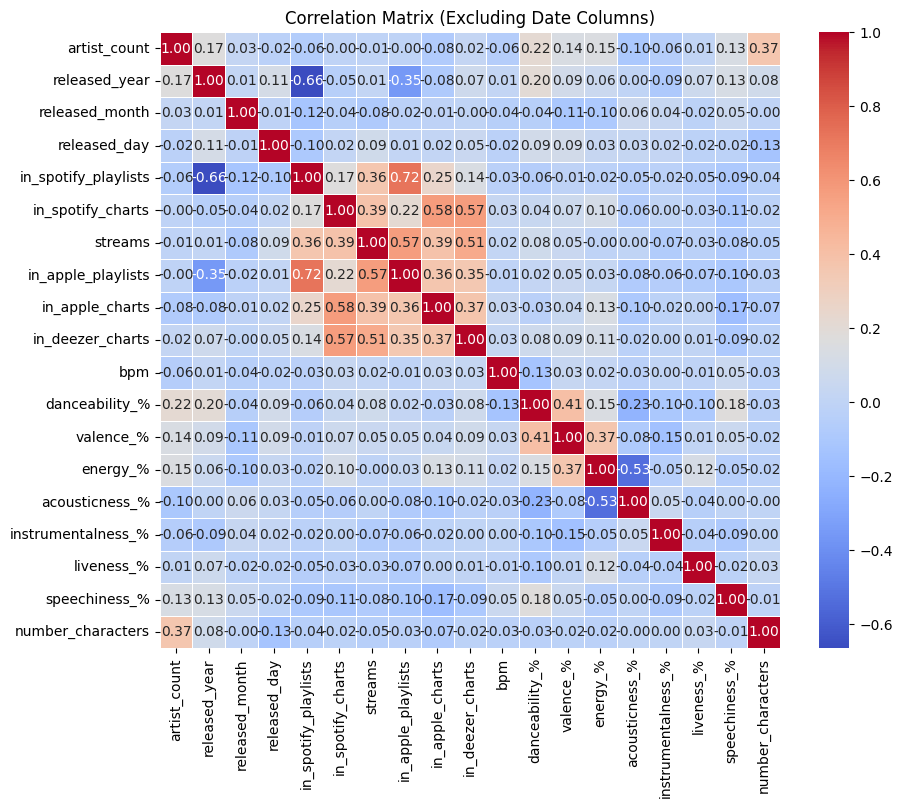

In [245]:
# Exclude the date columns
date_columns = ['released_year', 'released_month', 'released_day']

# Select only the numerical columns excluding the date ones
numerical_columns = df_filtered.select_dtypes(include=['number']).columns.tolist()

# Remove the date columns from the list of numerical columns
numerical_columns = [col for col in numerical_columns if col not in date_columns]

# Check if 'streams' is in the numerical columns list
if 'streams' not in numerical_columns:
    print("'streams' is not in the list of numerical columns. Checking the column type...")

    # Ensure 'streams' is numeric (convert if necessary)
    df_filtered['streams'] = pd.to_numeric(df_filtered['streams'], errors='coerce')  # Convert to numeric and handle errors

    # Re-check the list of numerical columns
    numerical_columns = df_filtered.select_dtypes(include=['number']).columns.tolist()
    if 'streams' not in numerical_columns:
        print("There was an issue with the 'streams' column. It might contain non-numeric values.")
    else:
        print("'streams' is now part of the numerical columns.")

# Calculate the correlation matrix
correlation_matrix = df_filtered[numerical_columns].corr()

# Plot the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation Matrix (Excluding Date Columns)")
plt.show()



### Step 7: Explore Additional Insights

#### 7.1. Distribution of Streams
This step visualizes the distribution of the streams data for the songs released from 2006 onward. We use a histogram with 50 bins and a kernel density estimate (KDE) to observe the shape of the distribution.

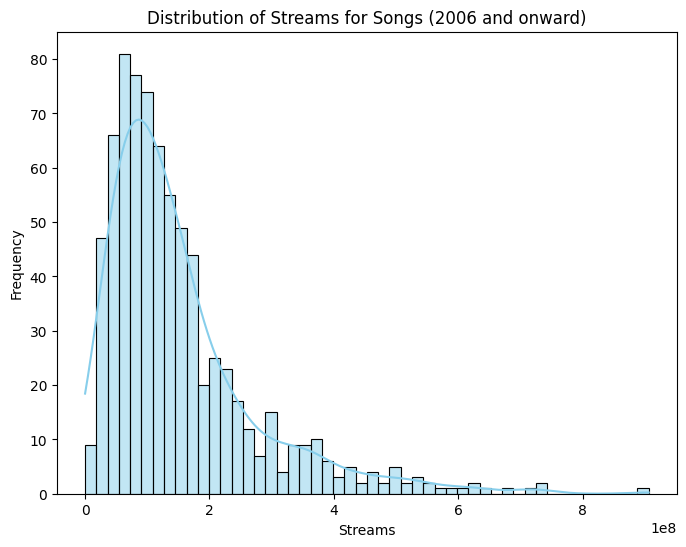

In [246]:
plt.figure(figsize=(8, 6))
sns.histplot(df_filtered['streams'], bins=50, kde=True, color='skyblue')
plt.title("Distribution of Streams for Songs (2006 and onward)")
plt.xlabel("Streams")
plt.ylabel("Frequency")
plt.show()


#### 7.2. Relationship Between Streams and Playlist Inclusion
This scatter plot visualizes the relationship between the number of Spotify playlists a song is included in (in_spotify_playlists) and its total streams (streams). It helps us understand if there’s any correlation between playlist inclusion and streaming success.

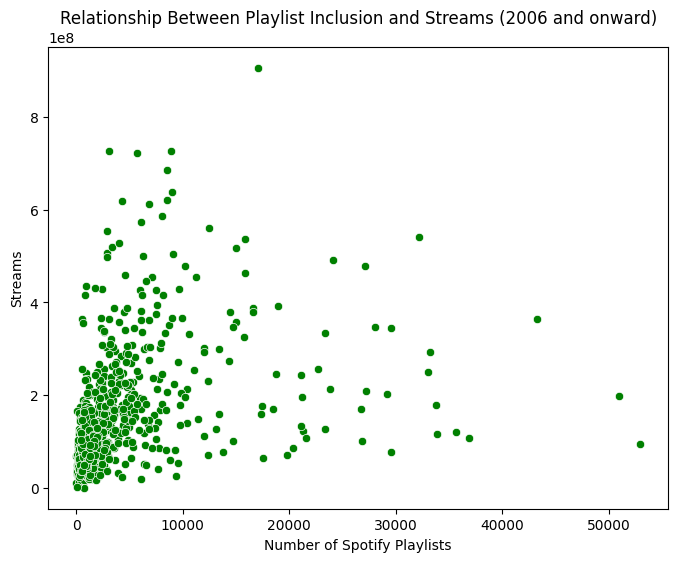

In [247]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_filtered, x='in_spotify_playlists', y='streams', color='green')
plt.title("Relationship Between Playlist Inclusion and Streams (2006 and onward)")
plt.xlabel("Number of Spotify Playlists")
plt.ylabel("Streams")
plt.show()


#### 7.3. Average Streams by Release Year
This line plot shows how the average streams for songs have changed over the years, starting from 2006. It helps identify trends in song popularity over time.

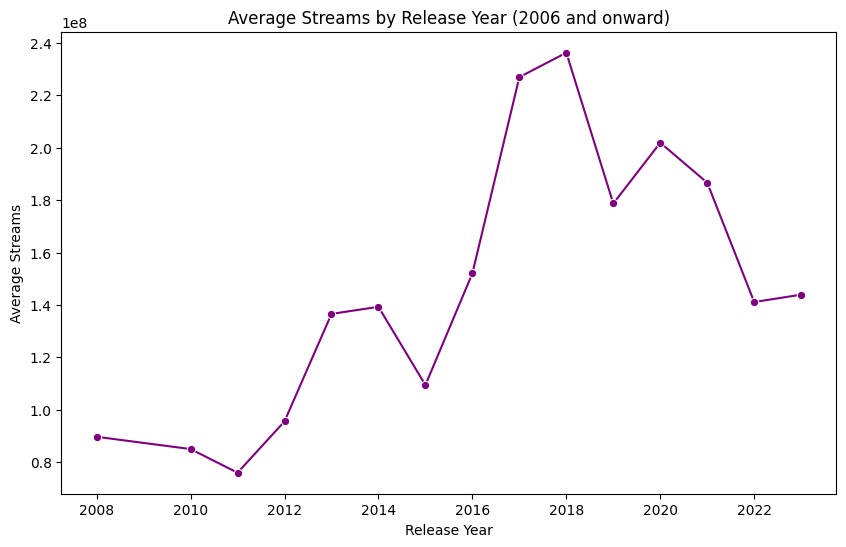

In [248]:
# Group by release year and calculate the average streams
average_streams_by_year = df_filtered.groupby('released_year')['streams'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.lineplot(data=average_streams_by_year, x='released_year', y='streams', marker='o', color='purple')
plt.title("Average Streams by Release Year (2006 and onward)")
plt.xlabel("Release Year")
plt.ylabel("Average Streams")
plt.show()


### Step 8: Additional Exploration: Most Streamed Songs
This step sorts the dataset by the number of streams in descending order and displays the top 10 most streamed songs.

In [249]:
# Sort the dataset by streams in descending order and show the top 10 songs
top_10_songs = df_filtered[['track_name', 'streams']].sort_values(by='streams', ascending=False).head(10)

print("Top 10 most streamed songs:")
print(top_10_songs)

Top 10 most streamed songs:
                                track_name    streams
84               STAY (with Justin Bieber)  906274972
87                         Me Porto Bonito  727582457
6                          Ella Baila Sola  725980112
133  Shakira: Bzrp Music Sessions, Vol. 53  721975598
74   Quevedo: Bzrp Music Sessions, Vol. 52  685065145
192                     Titi Me Preguntï¿½  638476761
77               Unholy (feat. Kim Petras)  621491119
34                                     TQG  618990393
57                              La Bachata  613111893
15                               Kill Bill  587362101


In [250]:
# Save the cleaned dataset to a new CSV file
# Create folder if not exists
import os
os.makedirs('data', exist_ok=True)
df_filtered.to_csv('data/spotify_cleaned.csv', index=False)

### Step 9: Get rid of columns we cannot use when doing inference (because the song isn't public yet)
We remove unnecessary columns related to other platforms, save a version of the dataset with song titles (track_name), and then drop the track_name column for a cleaner dataset ready for inference.

In [251]:
# Get rid of columns that are not useful when doing inference
columns_redundant = ['in_apple_charts', 'in_apple_playlists', 'in_deezer_charts', 'in_spotify_charts', 'in_spotify_playlists', 'in_shazam_charts', 'in_deezer_playlists']
df_filtered = df_filtered.drop(columns_redundant, axis=1)

# Save the dataset with track_name
df_filtered.to_csv('data/spotify_with_track_name.csv', index=False)

# Now drop the track name since all of them are different
df_filtered = df_filtered.drop(columns=['track_name'])

## 6. Creating the model

The objective of this part is to create a model that predicts if a song will be succesfull (the number of streams) given the characteristics (musical and non musical) of the song. 

### Step 1: Encode the categorical lables
In this code, we use `LabelEncoder` from `sklearn.preprocessing` to convert categorical columns into numeric values. We apply it to three columns: `artist_name`, `key`, and `mode`, encoding them into numeric labels. Although the `track_name` column is commented out for now, the process follows the same pattern. The result is a dataset where categorical variables are transformed into numeric format, making it suitable for machine learning models.

In [252]:
from sklearn.preprocessing import LabelEncoder

# Create and fit the LabelEncoders for the categorical columns
# le_song_name = LabelEncoder()
# df_filtered['track_name'] = le_song_name.fit_transform(df_filtered['track_name'])

le_artists = LabelEncoder()
df_filtered['artist_name'] = le_artists.fit_transform(df_filtered['artist_name'])

le_key = LabelEncoder()
df_filtered['key'] = le_key.fit_transform(df_filtered['key'])

le_mode = LabelEncoder()
df_filtered['mode'] = le_mode.fit_transform(df_filtered['mode'])
df_filtered.head()


,artist_name,artist_count,released_year,released_month,released_day,streams,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,number_characters
0,260,2,2023,7,14,141381703,125,2,0,80,89,83,31,0,8,4,35
1,326,1,2023,3,23,133716286,92,4,0,71,61,74,7,0,10,4,4
2,351,1,2023,6,30,140003974,138,8,0,51,32,53,17,0,31,6,7
3,455,1,2019,8,23,166638087,170,0,0,55,58,72,11,0,11,15,12
4,34,1,2023,5,18,303236322,144,0,1,65,23,80,14,63,11,6,14


### Step 2: Normalize numerical values
We use the StandardScaler to normalize the numerical columns in df_filtered, excluding the 'streams' column (which will be used directly for modeling). Additionally, the 'number_characters' column is excluded from normalization. After applying the standardization, all specified numerical columns in df_filtered are transformed to have a mean of 0 and a standard deviation of 1.

In [253]:
# # Normalize non-labeled-encoded numerical columns
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Exclude streams (this should be used for the model but the errors should be calculated normalizing streams)
numerical_columns = [col for col in numerical_columns if col != 'streams' and col not in columns_redundant]

# Do not standardize number_characters
numerical_columns = [col for col in numerical_columns if col != 'number_characters']

# Create a df_filtered wihout excluding streams
df_filtered[numerical_columns] = scaler.fit_transform(df_filtered[numerical_columns])

### Step 3: Select features
This code prepares the dataset for training a model by splitting it into features (`X`) and target variable (`y`). The target is the 'streams' column, and the features are various numerical and categorical columns like artist name, bpm, key, mode, and more. The dataset is split into training (80%) and testing (20%) sets using `train_test_split` from scikit-learn. The lengths of the resulting datasets (`X_train`, `X_test`, `y_train`, `y_test`) are then printed for verification.

In [254]:
from sklearn.model_selection import train_test_split

# Select the relevant features and target variable (all except charting data)
X = df_filtered[['artist_name', 'artist_count', 'released_year','released_month', 'released_day', 'bpm', 'key', 'mode', 'danceability_%', 'valence_%' ,'energy_%', 'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%', 'number_characters' ]]  # Features
y = df_filtered['streams']  # Target variable

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Verify the length of all datasets
print(f"Training feature set length: {len(X_train)}")
print(f"Testing feature set length: {len(X_test)}")
print(f"Training target set length: {len(y_train)}")
print(f"Testing target set length: {len(y_test)}")

Training feature set length: 609
Testing feature set length: 153
Training target set length: 609
Testing target set length: 153


###  Step 4: Try different models

This code trains a linear regression model on the training data (`X_train`, `y_train`), makes predictions on the test set (`X_test`), and evaluates the model using mean squared error (MSE), which compares predicted (`y_pred`) and actual (`y_test`) values. The MSE is printed to assess model performance.

In [255]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder


model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (Linear Regressor): {mse}")

Mean Squared Error (Linear Regressor): 1.339134241797976e+16


This code trains a RandomForestRegressor model with 100 trees on the training data (`X_train`, `y_train`), makes predictions on the test set (`X_test`), and evaluates the model by calculating the mean squared error (MSE) between the predicted (`y_pred_rf`) and actual (`y_test`) values. The MSE is printed to assess model performance.

In [256]:
from sklearn.ensemble import RandomForestRegressor

# Create the RandomForest Regressor model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model on the training data
rf_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred_rf = rf_model.predict(X_test)

# Calculate the Mean Squared Error (MSE)
mse_rf = mean_squared_error(y_test, y_pred_rf)

# Print the MSE for Random Forest
print(f"Mean Squared Error (Random Forest): {mse_rf}")

Mean Squared Error (Random Forest): 1.3242842656691492e+16


This code trains an XGBRegressor model with 100 estimators and a learning rate of 0.1 on the training data (`X_train`, `y_train`). It makes predictions on the test set (`X_test`) and calculates the mean squared error (MSE) between the predicted (`y_pred_xgb`) and actual (`y_test`) values. The MSE is printed to evaluate the model's performance.

In [257]:
from xgboost import XGBRegressor

xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
print(f"Mean Squared Error (XGBoost): {mse_xgb}")

Mean Squared Error (XGBoost): 1.3680512552208606e+16


This code trains a Support Vector Regressor (SVR) with an RBF kernel and regularization parameter `C=1.0`. It fits the model on the training data, makes predictions on the test set, and calculates the mean squared error (MSE) to evaluate performance.

In [258]:
from sklearn.svm import SVR

svr_model = SVR(kernel='rbf', C=1.0)
svr_model.fit(X_train, y_train)
y_pred_svr = svr_model.predict(X_test)
mse_svr = mean_squared_error(y_test, y_pred_svr)
print(f"Mean Squared Error (SVR): {mse_svr}")

Mean Squared Error (SVR): 1.4551243368622964e+16


This code trains a neural network regressor using the `MLPRegressor` with one hidden layer of 100 units, up to 500 iterations. It fits the model on the training data, makes predictions on the test set, and calculates the mean squared error (MSE) for evaluation.

In [259]:
from sklearn.neural_network import MLPRegressor

nn_model = MLPRegressor(hidden_layer_sizes=(100,), max_iter=500, random_state=42)
nn_model.fit(X_train, y_train)
y_pred_nn = nn_model.predict(X_test)
mse_nn = mean_squared_error(y_test, y_pred_nn)
print(f"Mean Squared Error (Neural Network): {mse_nn}")

Mean Squared Error (Neural Network): 3.5019175108254652e+16


This code trains a Ridge regression model with a regularization parameter (`alpha`) of 1.0. It fits the model on the training data, makes predictions on the test set, and computes the mean squared error (MSE) for evaluation.

In [260]:
from sklearn.linear_model import Ridge

ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)
y_pred_ridge = ridge_model.predict(X_test)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
print(f"Mean Squared Error (Ridge Regression): {mse_ridge}")

Mean Squared Error (Ridge Regression): 1.339070660742676e+16


### Step 6: Cross-validation for all models
This code evaluates multiple regression models using **5-fold cross-validation** and calculates the mean squared error (MSE) for each. It compares models including Linear Regression, Random Forest, XGBoost, Ridge Regression, Support Vector Regression (SVR), and a Neural Network. The model with the lowest average MSE is then selected as the best model.

In [261]:
from sklearn.model_selection import cross_val_score

# Define models
models = {
    "Linear Regression": model,
    "Random Forest": rf_model,
    "XGBoost": XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42),
    "Ridge Regression": Ridge(alpha=1.0),
    "SVR": SVR(kernel='rbf', C=1.0),
    "Neural Network": MLPRegressor(hidden_layer_sizes=(100,), max_iter=500, random_state=42)
}

# Evaluate models
for name, m in models.items():
    scores = cross_val_score(m, X, y, scoring='neg_mean_squared_error', cv=5)
    mse = -scores.mean()
    print(f"{name} Cross-Validated MSE: {mse}")

# Select the best model based on the lowest MSE
best_model = min(models, key=lambda x: -cross_val_score(models[x], X, y, scoring='neg_mean_squared_error', cv=5).mean())
print(f"Best Model: {best_model}")

Linear Regression Cross-Validated MSE: 1.6113163459192964e+16
Random Forest Cross-Validated MSE: 1.7930049017585568e+16
XGBoost Cross-Validated MSE: 1.921782134893356e+16
Ridge Regression Cross-Validated MSE: 1.611137249378882e+16
SVR Cross-Validated MSE: 1.6792190206624442e+16
Neural Network Cross-Validated MSE: 3.8260998150963816e+16
Best Model: Ridge Regression


The real error values are the following (calculated by normalizing `streams` and `number_characters` as well)
- Mean Squared Error (Linear Regressor): 0.5208175629742154
- Mean Squared Error (Random Forest): 0.43883440642074556
- Mean Squared Error (XGBoost): 0.45365087458736025
- Mean Squared Error (SVR): 0.9240434831090322
- Mean Squared Error (Neural Network): 0.725040679930679
- Mean Squared Error (Ridge Regression): 0.5206682344775846

### Step 7: Plot a comparison of the predicted values for all models
This code generates three scatter plots comparing the actual vs predicted stream values for different models:

1. **Linear Regression vs Random Forest**: Blue dots represent Linear Regression predictions, and red dots represent Random Forest predictions.
2. **XGBoost vs Ridge Regression**: Green dots for XGBoost and purple dots for Ridge Regression.
3. **SVR vs Neural Network**: Orange dots for SVR and brown dots for the Neural Network.

Each plot shows how well the predicted values match the actual values.

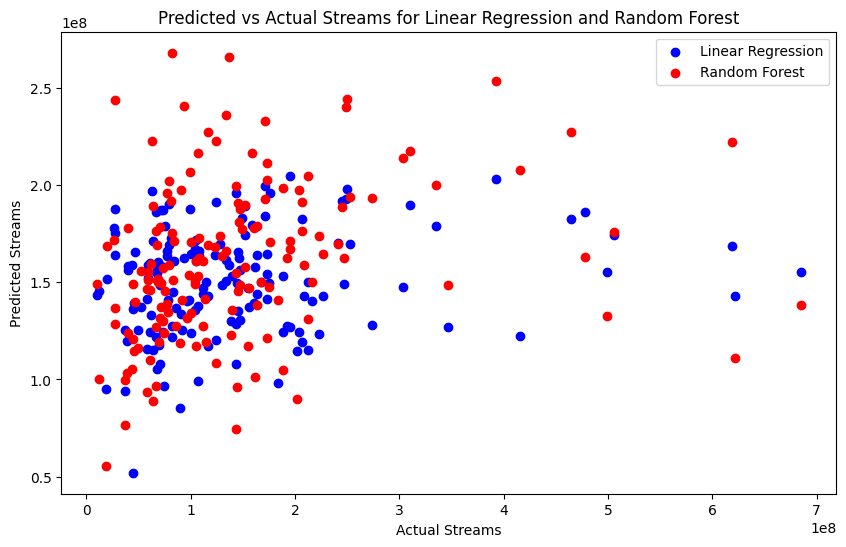

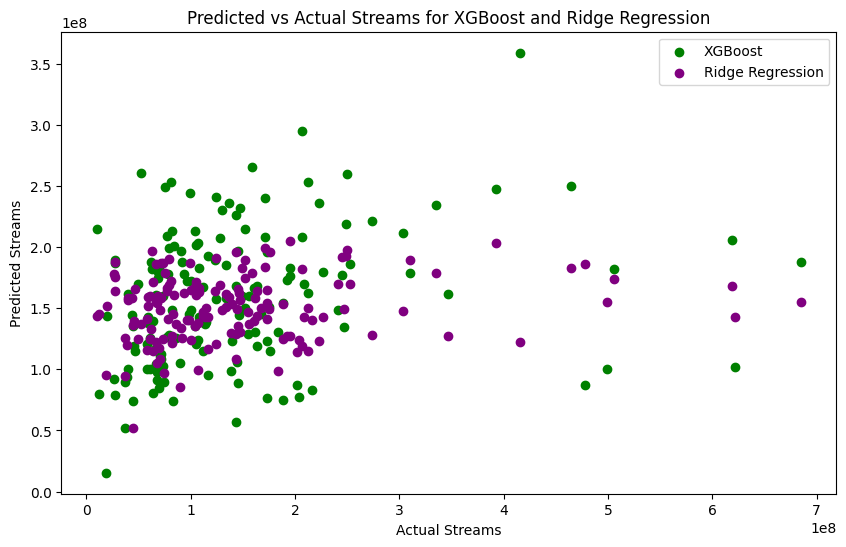

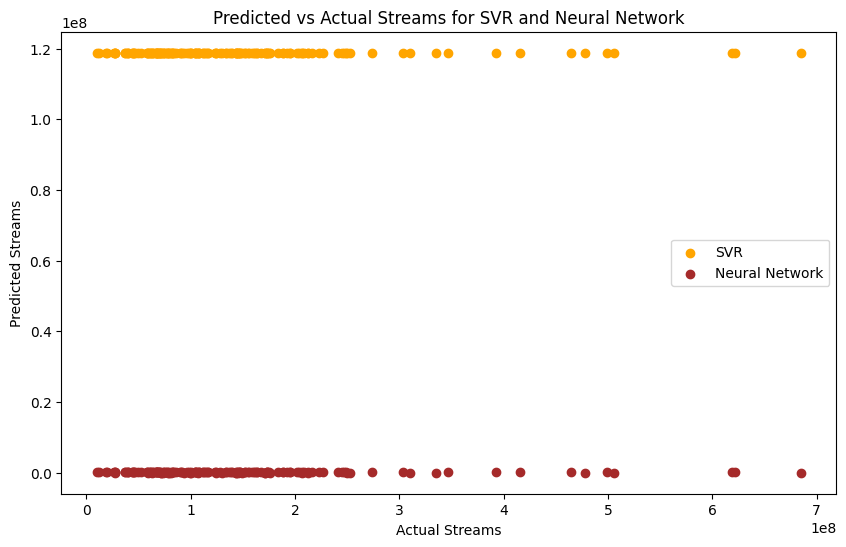

In [262]:
import matplotlib.pyplot as plt

# Plot the predicted vs actual values for Linear Regression and Random Forest
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', label='Linear Regression')
plt.scatter(y_test, y_pred_rf, color='red', label='Random Forest')
plt.xlabel('Actual Streams')
plt.ylabel('Predicted Streams')
plt.title('Predicted vs Actual Streams for Linear Regression and Random Forest')
plt.legend()
plt.show()

# Plot the predicted vs actual values for XGBoost and Ridge Regression
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_xgb, color='green', label='XGBoost')
plt.scatter(y_test, y_pred_ridge, color='purple', label='Ridge Regression')
plt.xlabel('Actual Streams')
plt.ylabel('Predicted Streams')
plt.title('Predicted vs Actual Streams for XGBoost and Ridge Regression')
plt.legend()
plt.show()

# Plot the predicted vs actual values for SVR and Neural Network
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_svr, color='orange', label='SVR')
plt.scatter(y_test, y_pred_nn, color='brown', label='Neural Network')
plt.xlabel('Actual Streams')
plt.ylabel('Predicted Streams')
plt.title('Predicted vs Actual Streams for SVR and Neural Network')
plt.legend()
plt.show()

### Step 8: Plot the residuals of each model
This code creates a 3x2 grid of histograms to visualize the residuals for different models. Each plot shows the distribution of the residuals (actual - predicted values) for the respective model:

1. **Linear Regression**: Plot in the top-left corner.
2. **Random Forest**: Plot in the top-right corner.
3. **XGBoost**: Plot in the middle-left.
4. **Ridge Regression**: Plot in the middle-right.
5. **SVR**: Plot in the bottom-left.
6. **Neural Network**: Plot in the bottom-right.

Each histogram helps evaluate how well the model's predictions align with actual values by showing the error distribution.

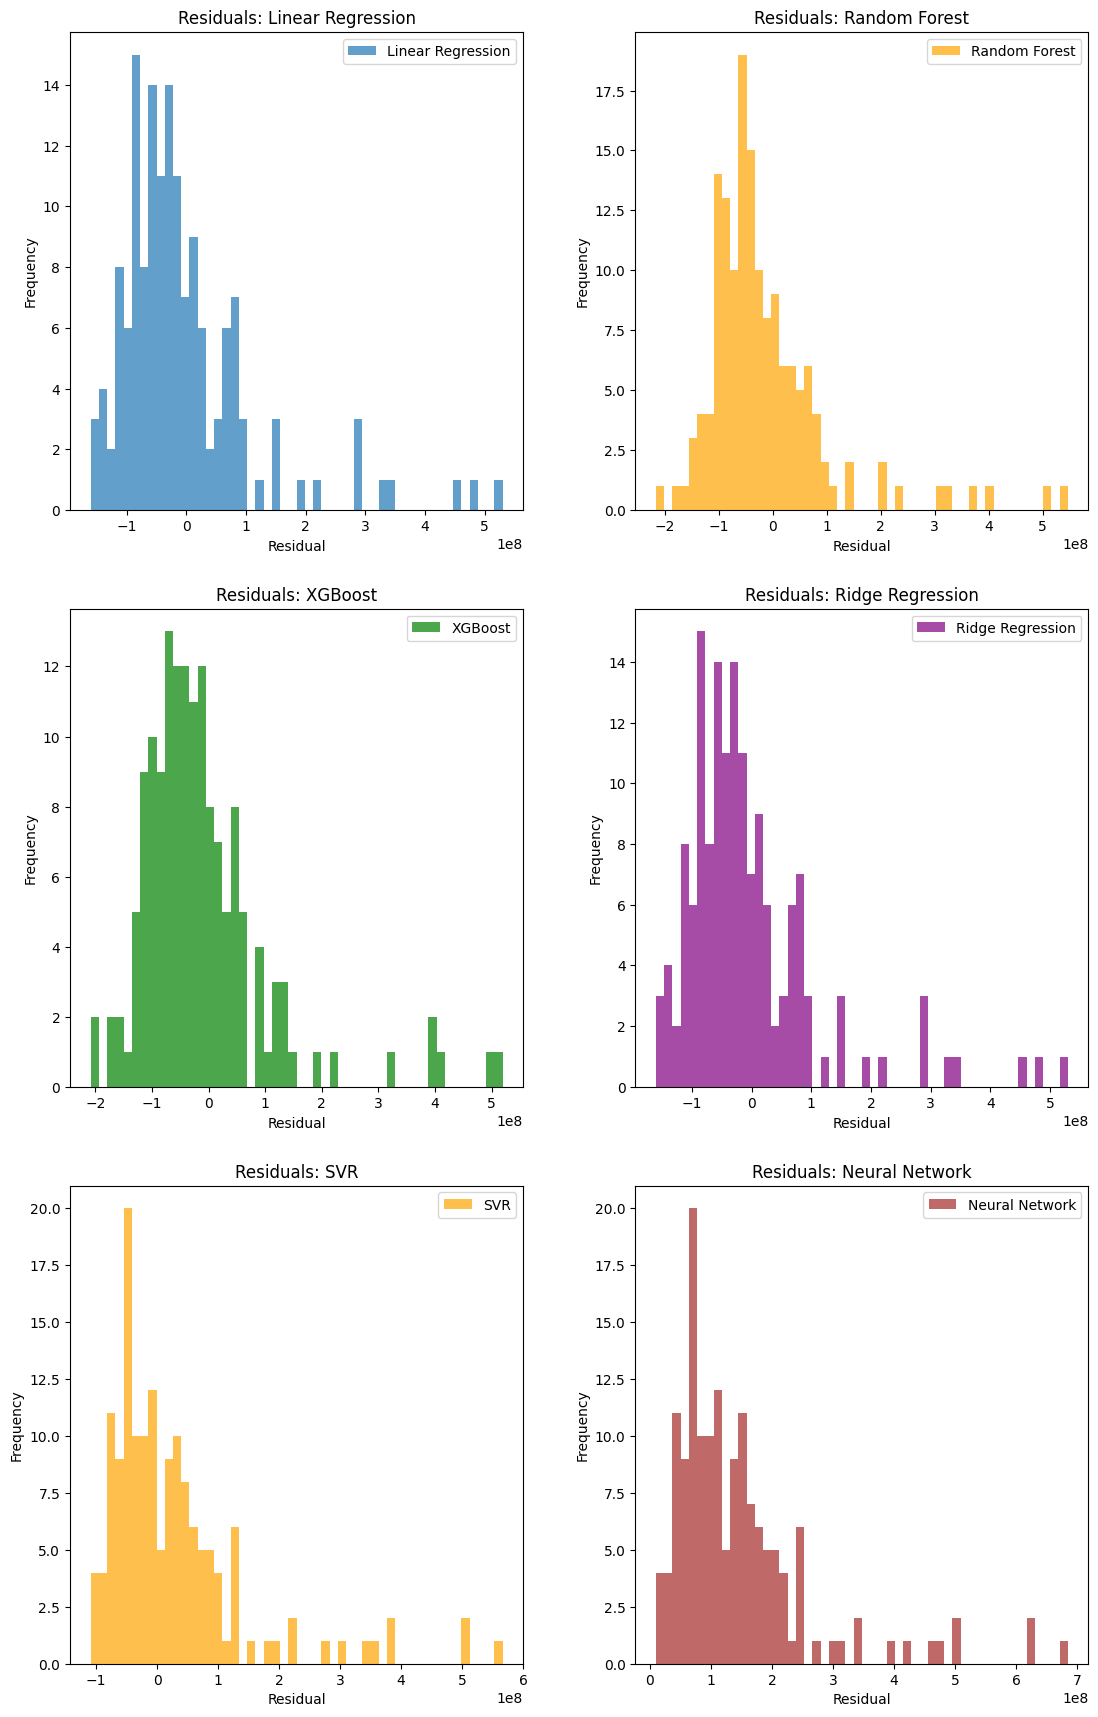

In [263]:
import matplotlib.pyplot as plt

# Create a 3x2 grid for the plots
fig, axes = plt.subplots(3, 2, figsize=(12, 18))  # Adjust size as needed
fig.tight_layout(pad=5.0)  # Add space between plots

# Linear Regression Residuals
axes[0, 0].hist(y_test - y_pred, bins=50, alpha=0.7, label='Linear Regression')
axes[0, 0].set_title('Residuals: Linear Regression')
axes[0, 0].set_xlabel('Residual')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].legend()

# Random Forest Residuals
axes[0, 1].hist(y_test - y_pred_rf, bins=50, alpha=0.7, label='Random Forest', color='orange')
axes[0, 1].set_title('Residuals: Random Forest')
axes[0, 1].set_xlabel('Residual')
axes[0, 1].set_ylabel('Frequency')
axes[0, 1].legend()

# XGBoost Residuals
axes[1, 0].hist(y_test - y_pred_xgb, bins=50, alpha=0.7, label='XGBoost', color='green')
axes[1, 0].set_title('Residuals: XGBoost')
axes[1, 0].set_xlabel('Residual')
axes[1, 0].set_ylabel('Frequency')
axes[1, 0].legend()

# Ridge Regression Residuals
axes[1, 1].hist(y_test - y_pred_ridge, bins=50, alpha=0.7, label='Ridge Regression', color='purple')
axes[1, 1].set_title('Residuals: Ridge Regression')
axes[1, 1].set_xlabel('Residual')
axes[1, 1].set_ylabel('Frequency')
axes[1, 1].legend()

# SVR Residuals
axes[2, 0].hist(y_test - y_pred_svr, bins=50, alpha=0.7, label='SVR', color='orange')
axes[2, 0].set_title('Residuals: SVR')
axes[2, 0].set_xlabel('Residual')
axes[2, 0].set_ylabel('Frequency')
axes[2, 0].legend()

# Neural Network Residuals
axes[2, 1].hist(y_test - y_pred_nn, bins=50, alpha=0.7, label='Neural Network', color='brown')
axes[2, 1].set_title('Residuals: Neural Network')
axes[2, 1].set_xlabel('Residual')
axes[2, 1].set_ylabel('Frequency')
axes[2, 1].legend()

# Show the entire grid of plots
plt.show()

### Step 9: Feature Explainability
This code calculates and visualizes feature importances for the XGBoost model. It retrieves the importance values using `xgb_model.feature_importances_`, creates a DataFrame with features and their importances, and sorts it in descending order. Then, it uses a bar plot to display the most important features, helping to identify key predictors for the model.

As you can see features as speachiness and mode predominate over other features in terms of importance.

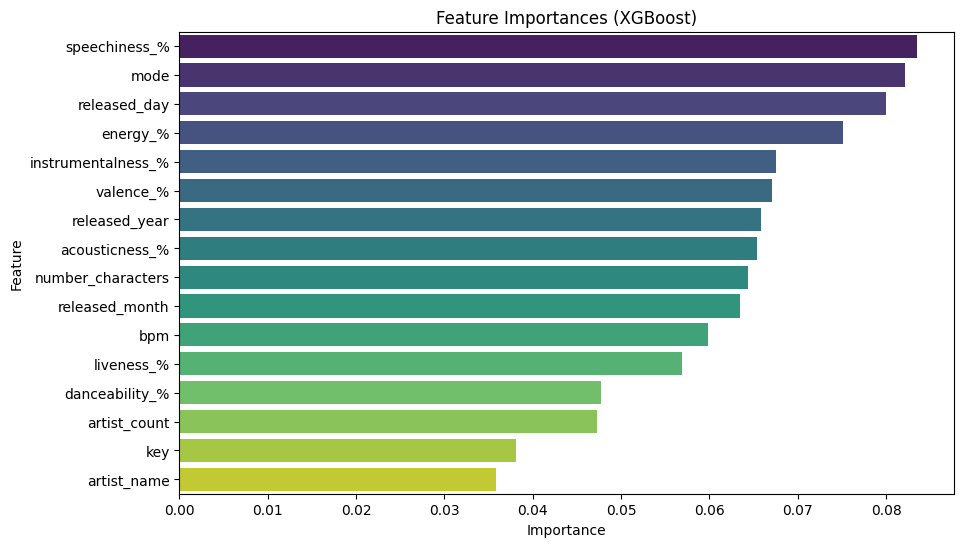

In [264]:
# Calculate the feature importances for XGBoost
importances = xgb_model.feature_importances_

# Create a DataFrame to display the feature importances
feature_importances = pd.DataFrame({'feature': X.columns, 'importance': importances})

# Sort the values by importance
feature_importances = feature_importances.sort_values('importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 6))
sns.barplot(data=feature_importances, x='importance', y='feature', palette='viridis')
plt.title('Feature Importances (XGBoost)')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

This code uses SHAP (SHapley Additive exPlanations) to explain the predictions made by the XGBoost model. It first creates an explainer for the trained XGBoost model using the test set (`X_test`). Then, it calculates SHAP values to interpret the feature importance. Finally, a summary plot is generated to visually show the impact of each feature on the model's predictions, with higher importance features ranked accordingly.

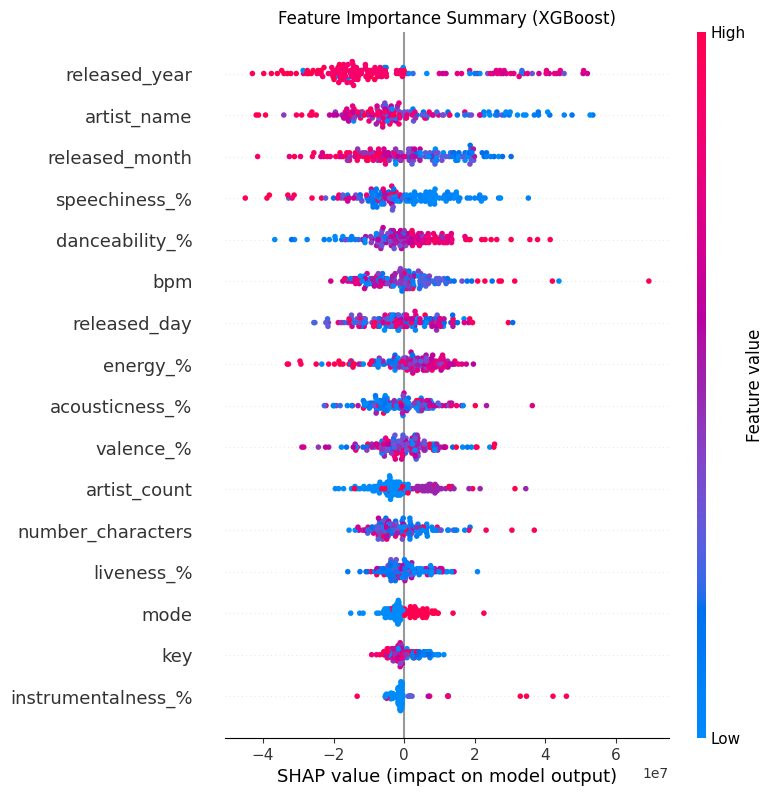

In [265]:
import shap

# Create SHAP explainer for XGBoost
explainer = shap.Explainer(xgb_model, X_test)

# Calculate SHAP values
shap_values = explainer(X_test)

shap.summary_plot(shap_values, X_test, show=False)
plt.title("Feature Importance Summary (XGBoost)")
plt.show()

## 7 Saving the model and label encoders
This code saves the XGBoost model, dataset, LabelEncoders, StandardScaler, and SHAP explainer into respective files and directories for future use. The model is saved as a `.pkl` file, and the dataset is stored as a CSV file. The LabelEncoders, scaler, and SHAP explainer are also serialized and stored.

In [266]:
# Save the XGBoost model
import pickle
# Create folder if not exists
import os
os.makedirs('model', exist_ok=True)
with open('model/xgboost_model.pkl', 'wb') as file:
    pickle.dump(xgb_model, file)

# Save the dataset
df_filtered.to_csv('data/spotify_inference.csv', index=False)

# Before saving the le_key ensure all keys are correctly encoded
print(f"Unique keys: {le_key.inverse_transform(df_filtered['key'].unique())}")


# Save the LabelEncoders
with open('model/label_encoders.pkl', 'wb') as file:
    # pickle.dump(le_song_name, file)
    pickle.dump(le_artists, file)
    pickle.dump(le_key, file)
    pickle.dump(le_mode, file)

# Save the StandardScaler
with open('model/standard_scaler.pkl', 'wb') as file:
    pickle.dump(scaler, file)

# Save the SHAP explainer
with open('model/shap_explainer.pkl', 'wb') as file:
    pickle.dump(explainer, file)

Unique keys: ['B' 'C#' 'F' 'A' 'C' 'D' 'F#' 'G#' 'G' 'E' 'A#' 'D#']


In [267]:
# Display the head
df_filtered.head()

,artist_name,artist_count,released_year,released_month,released_day,streams,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,number_characters
0,260,0.471364,0.736341,0.256888,-0.000286,141381703,0.086027,2,0,0.849387,1.634333,1.188028,0.200272,-0.188416,-0.755013,-0.651300,35
1,326,-0.658131,0.736341,-0.886170,0.981464,133716286,-1.091565,4,0,0.216362,0.432163,0.614422,-0.760529,-0.188416,-0.606390,-0.651300,4
2,351,-0.658131,0.736341,-0.028876,1.745048,140003974,0.549927,8,0,-1.190360,-0.812941,-0.723991,-0.360195,-0.188416,0.954152,-0.457815,7
3,455,-0.658131,-0.696844,0.542653,0.981464,166638087,1.691834,0,0,-0.909016,0.303360,0.486954,-0.600396,-0.188416,-0.532078,0.412871,12
4,34,-0.658131,0.736341,-0.314641,0.436047,303236322,0.764034,0,1,-0.205655,-1.199352,0.996826,-0.480296,6.967522,-0.532078,-0.457815,14
